In [32]:
import numpy as np 
import pandas as pd

data={
    "이름" : ["홍길동","신사임당","강감찬","을지문덕"],
    "학과" : ["컴퓨터","영문","기계","수학"],
    "학년" : [1,3,4,2],
    "학점" : [1.5,4.5,2.2,3.5]
}

df = pd.DataFrame(data,
                 columns = ["학년","학과","이름","학점","등급"],
                 index= ["one","two","three","four"])


#display(df["이름"]) # 이건 시리즈로 나온다. 
#display(df[["이름"]]) # 데이터 프레임에서 하나의 컬럼을 인덱싱
# display(df[["이름" :"학점"]])    슬라이싱은안댄다
#display(df[["학년","학점"]]) # fancy indexing
# display(df["3"]) 숫자인덱싱은 안된다 숫자한개는 row가 기반 또한 단일행은 인덱싱이 안된다, 두개는 되나바 
display(df[1:-1]) # 근데 슬라이싱은 된다? row 슬라이싱
"연속적이지 않은 행 을 불러 올때는?"
#display(df[[0]]) # 팬시 인덱싱 안댐 숫자이용하는 인덱싱 안댐
"로우 인덱싱 해보자 "
# 인덱스 이름을 이용해서 
display(df["one":"three"]) # 다른건 다안대는데 슬라이싱은 가능해 
"그러나 슬라이싱할땐 무조건 이름으로만 하자 [-1:'three'] 이런건 안댄다 "

## 행과 열을 가져오기 위해서 어떻게 해야하는가 
## 어떤방식이 지원되고 어떤방식이 지원되지 않는지를 구분 


,학년,학과,이름,학점,등급
two,3,영문,신사임당,4.5,NaN
three,4,기계,강감찬,2.2,NaN


,학년,학과,이름,학점,등급
one,1,컴퓨터,홍길동,1.5,NaN
two,3,영문,신사임당,4.5,NaN
three,4,기계,강감찬,2.2,NaN


In [54]:
# row indexing 을 할때 단일 행을 못들고 온다 .
# 팬시도 안댄다 .
# loc속성을 이용하면 할수 있다
data={
    "이름" : ["홍길동","신사임당","강감찬","을지문덕"],
    "학과" : ["컴퓨터","영문","기계","수학"],
    "학년" : [1,3,4,2],
    "학점" : [1.5,4.5,2.2,3.5]
}

df = pd.DataFrame(data,
                 columns = ["학년","학과","이름","학점","등급"],
                 index= ["one","two","three","four"])

df.loc[["two","three"]]   # loc 속성을 이용하면 컬럼뺄때 쓰던거 다 된다. 
df.loc["one":"three"]      
#df.loc[1:4]  # 숫자는 사용이 불가능 하다      
df.loc["one":"three"][["이름"]]  # 당연히 이중으로 하는것도 된다. 
df.loc["one":"three","이름":"학점"] # 한번에 열도 가능 게다가 컬럼도 슬라이싱이 가능하다
df.loc["one":"three",["이름","학과"]] # 팬시 인덱싱도 가능하다.

,이름,학과
one,홍길동,컴퓨터
two,신사임당,영문
three,강감찬,기계


In [96]:
## CS에서 특정 대상에 대해 4가지 작업을 할 수 있다. 
## 추가 삭제 수정 검색 => CRUD
## C: Create 추가 R:Read 검색 U:Update 수정 D: Delete 삭제
data={
    "이름" : ["홍길동","신사임당","강감찬","을지문덕"],
    "학과" : ["컴퓨터","영문","기계","수학"],
    "학년" : [1,3,4,2],
    "학점" : [1.5,4.5,2.2,3.5]
}

df = pd.DataFrame(data,
                 columns = ["학년","학과","이름","학점","등급"],
                 index= ["one","two","three","four"])


# df.loc["five"]=[2,"체육","김연아",4.5,np.nan]
#df.loc["five","이름":"학점"]=["김연아",4.5]
df.loc["five",["이름","학점"]]=["김연아",4.5]
df
# 원래 존재하는 row 에 대해서 assign 작업을 하면 당연히 update 작업이 수행된다.

# 삭제를 해보자 
# new_df = df.drop ("학점",axis=1)  # inplace = TRUE 하면 원본이 수정되니까 건드리지 말자 
# new_df
df.drop("one",axis = 0)   # 행 삭제 axis 가 0이면 행 1이면 열 

# 행을 삭제할때 Fancy indexing 을 지원한다 슬라이싱안댕
# 숫자 인덱스를 통해 행과 열을 선택할 수 있는 명령어 iloc
df.iloc[[0,1]]
df.iloc[0:3]
df.iloc[[0,1],[1,2]]   # iloc 쓰면 이것저것 다 된다. 
## iloc 는 검색 추출용으로 쓰고 loc는 추가 할때 사용하면 좋다. 
display(df)

# 불리언 인덱싱은 기본적으로 마스크를 사용
df.iloc[0:,[3]]>3
# 3이상인 학과와 이름을 출력
df.loc[df["학점"]>3.0,["학과","이름"]]

,학년,학과,이름,학점,등급
one,1.0,컴퓨터,홍길동,1.5,NaN
two,3.0,영문,신사임당,4.5,NaN
three,4.0,기계,강감찬,2.2,NaN
four,2.0,수학,을지문덕,3.5,NaN
five,NaN,NaN,김연아,4.5,NaN


,학과,이름
two,영문,신사임당
four,수학,을지문덕
five,NaN,김연아


In [145]:
data={
    "이름" : ["이지만","박동훈","홍길동","깅김친","오해영"],
    "학과" : ["컴퓨터","기계","철학","컴퓨터","철학"],
    "학년" : [1,3,4,2,3],
    "학점" : [1.5,2.0,3.1,1.1,2.7]
}

df = pd.DataFrame(data,
                 columns = ["학과","이름","학점","학년","등급"],
                 index= ["one","two","three","four","five"])

# 1 이름이 박동훈 찾아라  이름과 학점
df.loc[df["이름"]=="박동훈",["이름","학점"]]
# 2  학점이 (1.5 2.5)인 사람을 찾아 확과 이름 학점
display(df.loc[(df["학점"] >1.5) & (df["학점"] <2.5),["학과","이름","학점"]])

df1=df.loc[df["학점"] >1.5,["학과","이름","학점"]]
df1.loc[df["학점"] <2.5]  
# 3 학점이 3.0 초과하는 사람을 찾아 등급을 "A" 로 설정
df["학점"]>3.0
df.loc[df["학점"]>3.0,"등급"]="A"
df

,학과,이름,학점
two,기계,박동훈,2.0


,학과,이름,학점,학년,등급
one,컴퓨터,이지만,1.5,1,NaN
two,기계,박동훈,2.0,3,NaN
three,철학,홍길동,3.1,4,A
four,컴퓨터,깅김친,1.1,2,NaN
five,철학,오해영,2.7,3,NaN


In [190]:
# 데이터 프레임 제어 
np.random.seed(3)
# 0,10 정수형 난수 균등분포로 (6,4)생성
ran = np.random.randint(0,10,(6,4))
print(ran)

df=pd.DataFrame(ran)
df
# 행렬을 다시 정의해보자
df.columns =["a","b","c","d"]
df.index= pd.date_range("20190101",periods=6)# 피리어드를 이용해서 종료 날짜 쉽게 구한다 

#NaN 값을 포함하는 새로운 컬럼 E를 추가 
df["E"]=[7,np.nan,np.nan,np.nan,5,np.nan]
df
#NaN 은 결측값이지만 float로 간주된다. 연산이 가능함 연산 결과는 NaN

#결측값 제어
# 결측값이 포함되어 있는 행을 삭제해주는 코드가 있다. 
#df.dropna(how)
#df1= df.dropna(how="any", axis=0 ,inplace = False)
#how = 뒤에 올수 있는거 
'''
how = "all" 해당행이 전부 NaN이면 지워


'''
# 드랍 대신 fill명령어 또한 있다.
#df1 = df.fillna(value = 0)

# 결측값이 포함된 행을 찾아서 b와 C 컬럼의 값을 출력

# nan을 판별하는 함수 :isnull()
#df.iloc([df["E"].isnull()],])
df.loc[df["E"].isnull(),["b","c"]]

[[8 9 3 8]
 [8 0 5 3]
 [9 9 5 7]
 [6 0 4 7]
 [8 1 6 2]
 [2 1 3 5]]


,b,c
2019-01-02,0,5
2019-01-03,9,5
2019-01-04,0,4
2019-01-06,1,3


[4 6 1 3 8 8]
[-15.3 -17.3  10.7  -1.3  12.7  13.7  13.7 -19.3 -12.3  14.7]
2.7666666666666666


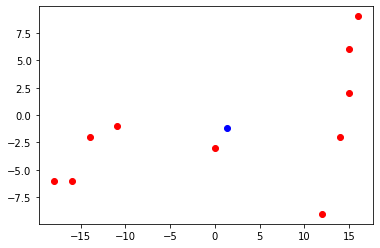

[[214.01111111  42.95555556]
 [ 42.95555556  30.84444444]]


In [235]:
# 분석용 함수(기본통계함수)
# 평균 편차 분산 표준편차 공분산, 상관계수

## 평균 (mean) 

## 편차: 확룰 변수 x와 평균값의 차이 

## 분산: 데이터의 흩어짐 정도를 알기 위해서 사용하는 값으로 편차의 제곱의 평균    제평평제

## 표준편차: 분산의 제곱근
            # 분산의 단위 문제를 해결하고자 사용 
    
###
import numpy as np 
arr = np.array([4,6,1,3,8,8],dtype = np.int32)
arr2 = np.array([5,6,3,9,4,1],dtype = np.int32)

print(arr)
arr.mean()
np.mean(arr)
np.var(arr)
np.std(arr)
np.cov(arr,arr2)

# 공분산 : 두개의 확률변수 X,Y가 있을때 이 두개의 확률변수의 관계를 보여줄때 사용한다. 
# 공분산은 두 확률변수의 편차의 곱의 평균으로 표현한다
# 데이터가 평균으로부터 얼마나 떨어져 있느냐를 표현하는 그래프를 그려보자 
import matplotlib.pyplot as plt
# 만약 에러나면 깔아요 

np.random.seed(913)
x=np.random.randint(-20,20,(10,))
y=np.random.randint(-10,10,(10,))
x_mean=x.mean()
y_mean=y.mean()

x_dev = x-x_mean
y_dev = y-y_mean
print(x_dev)
result=0
for i in range(10):
    result =+ (x_dev[i]+y_dev[i])
    
print(result/9)        # 모 공분산 : 원래 공식
                        # 표준 공분산 : n이 아닌 n-1 로 나눔 추청치가 좋아짐 
## 산점도 (scatter )그리기 

plt.scatter(x,y,color='red')
plt.scatter(x_mean,y_mean,color="blue")
plt.show()
print(np.cov(x,y))

In [ ]:
## 공분산이 양수인 경우( KOSPI 지수와 삼성전자 주가)



import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
# pandas_datareader가 anaconda내에 없어 설치하지못함
# pip 명령어로 (python 명령어) 설치



# 특정 날짜를 이용해서 금융데이터를 가져올 것
start = datetime(2016,1,1)   #시작날짜
end = datetime(2018,12,31)   #끝날짜

'''
멀티캠퍼스 컴퓨터 내에서는 접근 불가, 집에서는 가능할 것!
df_KOSPI = pdr.DataReader("^KS11", "yahoo", start, end)   #KS11: 한국코스피 지수
df_KOSPI.to_json("./data/KOSPI.json")
'''

# json 접근이 불가해서, 제공된 json 파일을 이용
# 공유 폴더의 주식데이터 

import json

file_KOSPI = open("./data/KOSPI.json","r")
file_SE = open("./data/SE.json","r")
df_KOSPI = pd.DataFrame(json.load(file_KOSPI))
df_SE = pd.DataFrame(json.load(file_SE))

close_KOSPI = df_KOSPI["Close"]
close_SE = df_SE["Close"]

print(np.cov(close_KOSPI, close_SE))


# LIG 넥스원과 부산산업을 대상으로 공분산 계산 

import json

file_LIG = open("./data/LIG넥스원.json","r")
file_BUSAN = open("./data/부산산업.json","r")
df_LIG = pd.DataFrame(json.load(file_LIG))
df_BUSAN = pd.DataFrame(json.load(file_BUSAN))

close_LIG = df_LIG["Close"]
close_BUSAN = df_BUSAN["Close"]

print(np.cov(close_LIG , close_BUSAN))



